# Mini-projeto sobre K-means
**Dataset:** [U.S. News and World Report’s College Data](https://www.kaggle.com/datasets/flyingwombat/us-news-and-world-reports-college-data)

**Grupo:**
*   Amanda Moraes
*   Luis Eduardo Alves
*   Maria Eduarda dos Santos
*   Samuel Santos
*   Tales Tomaz Alves



## Dependências

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

## Dados

In [52]:
uploaded = files.upload()

Saving College.csv to College (1).csv


In [65]:
df = pd.read_csv("College.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [66]:
df = df.drop(['Unnamed: 0'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [67]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [68]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [69]:
df['Private'] = df['Private'].apply(converter)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


In [72]:
x = df.drop(['Private'],axis=1)
y = df["Private"]

### Normalização

In [73]:
# Normalização dos atributos descritivos
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
x_scaled.columns = x.columns
x = x_scaled
x

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


### Separação de sets

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## K-means

### 🧠 **Abordagem 1**

**Proposta:**
Avaliar o desempenho do Kmeans para diferentes valores de K e com os 17 atributos originais dos dados com:
- Método da silhueta
- Método do cotovelo
- Classification report
```
n_clusters = [1,2,3,4,5,6,7,8,9]
```

**Resultados obtidos:**
- **Método da silhueta**
  - Análise do coeficiente e visualização por gráficos mostraram que o `melhor coeficiente de silhueta foi 0.23` com `k=3`
- **Método do cotovelo**
  - Análise da SSE e do gráfico de SSE para os diferentes k mostraram que a curva se acentua `entre k=2 e k=3`, com `maior decaimento acontece quando k=2`
- **Classification report**
  - Métricas com o k=2 encontrado atingiram `acurácia de 49%`



For n_clusters = 2 The average silhouette_score is : 0.22310591315078054
For n_clusters = 3 The average silhouette_score is : 0.2359766206763949
For n_clusters = 4 The average silhouette_score is : 0.18685091806252338
For n_clusters = 5 The average silhouette_score is : 0.1913882902283041
For n_clusters = 6 The average silhouette_score is : 0.17400570325212183
For n_clusters = 7 The average silhouette_score is : 0.12311489198272511
For n_clusters = 8 The average silhouette_score is : 0.11794630865274984
For n_clusters = 9 The average silhouette_score is : 0.1284914133367918


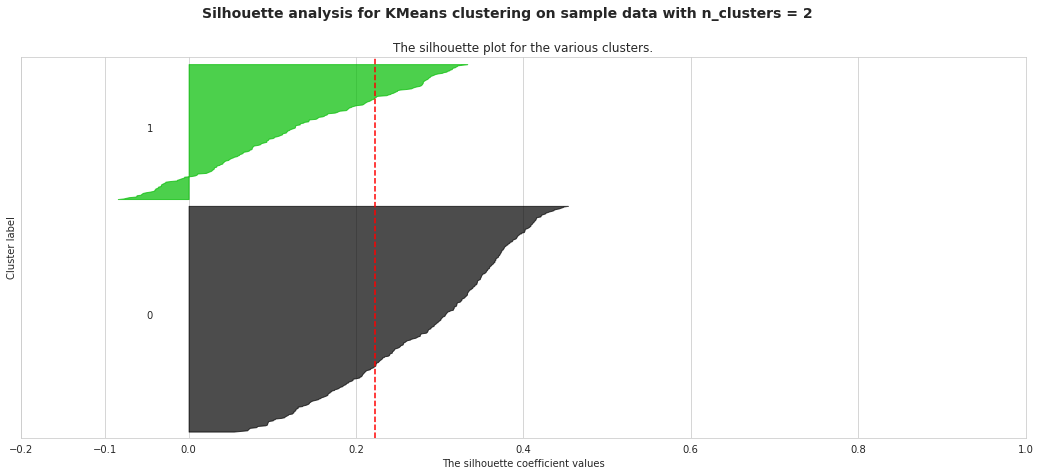

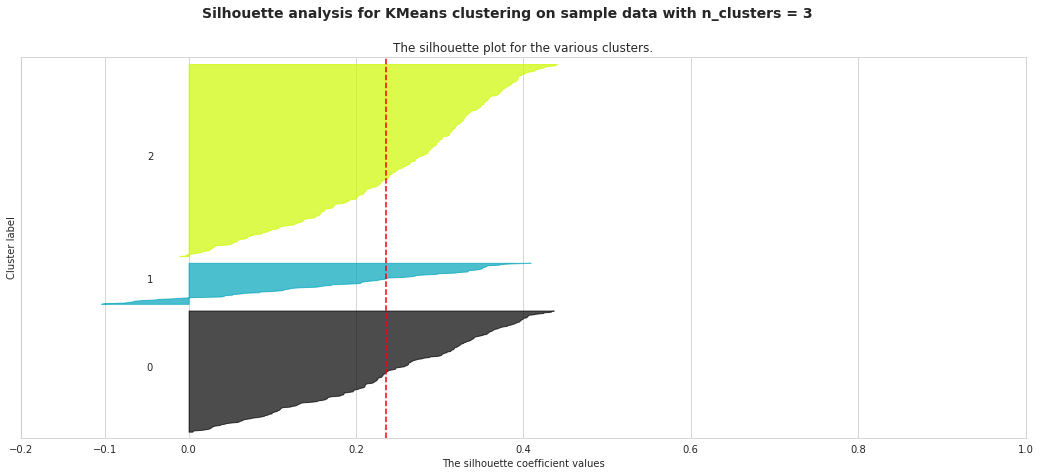

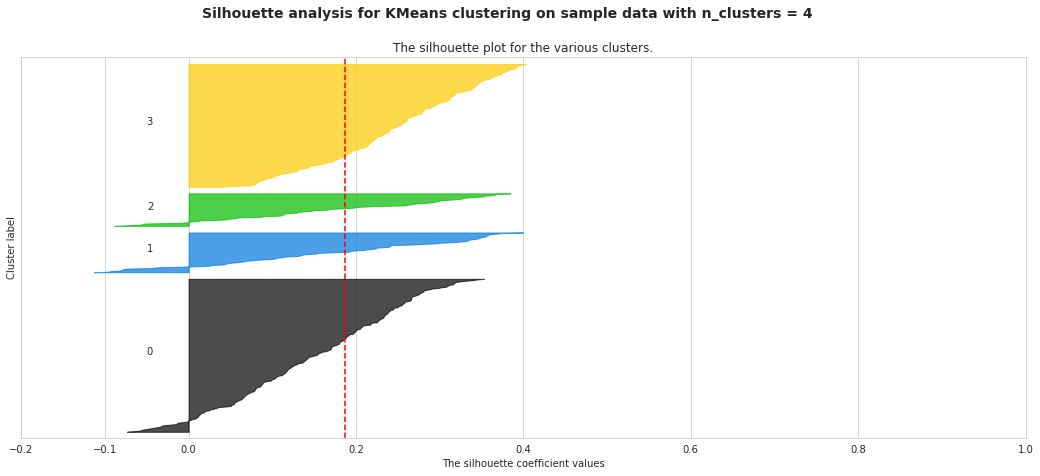

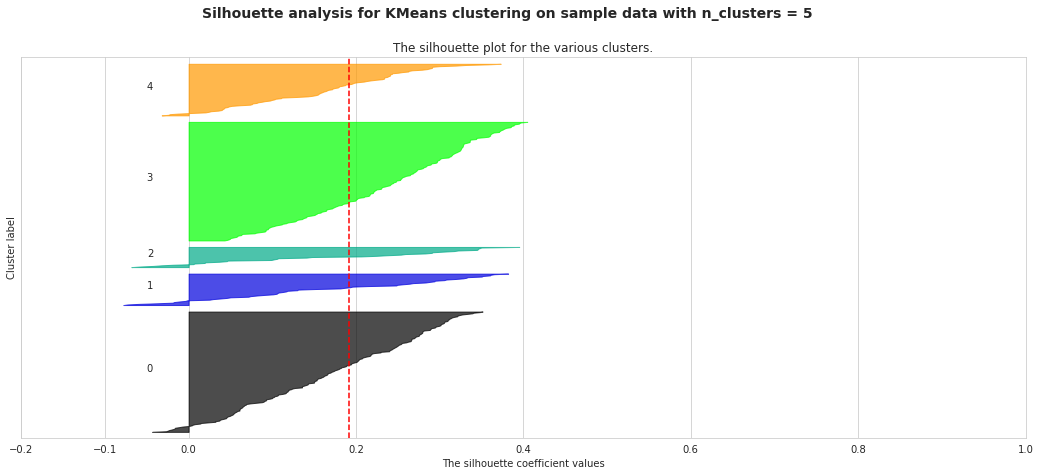

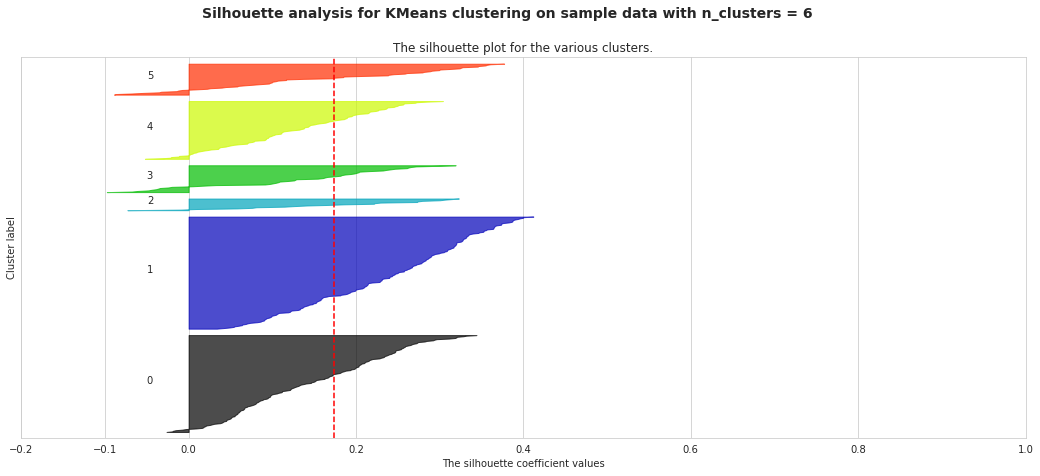

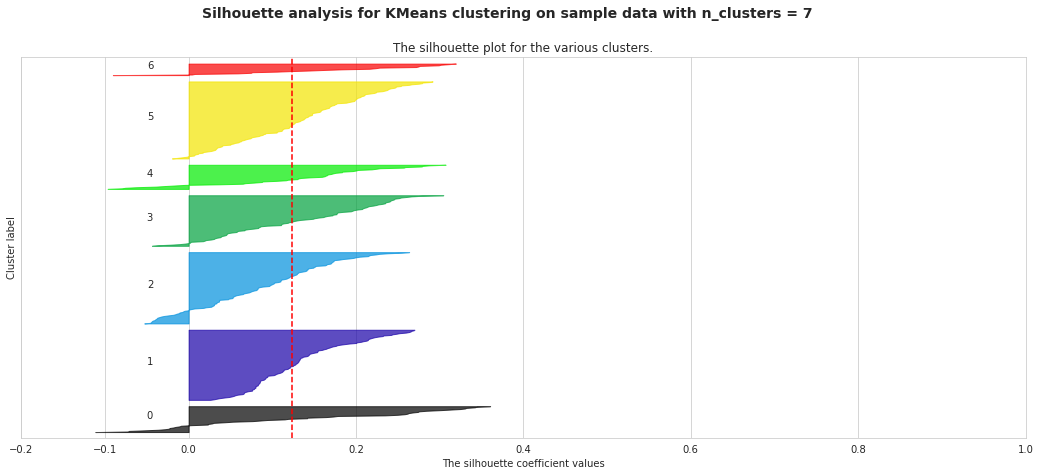

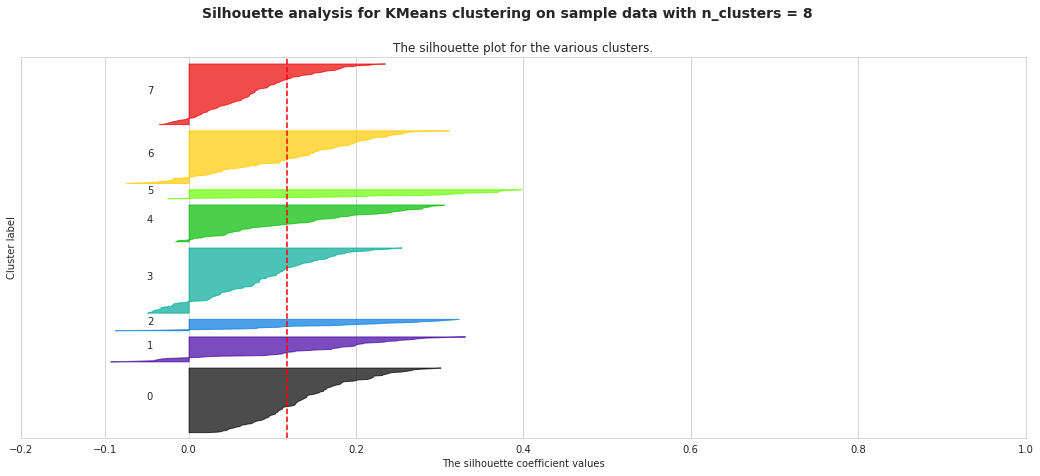

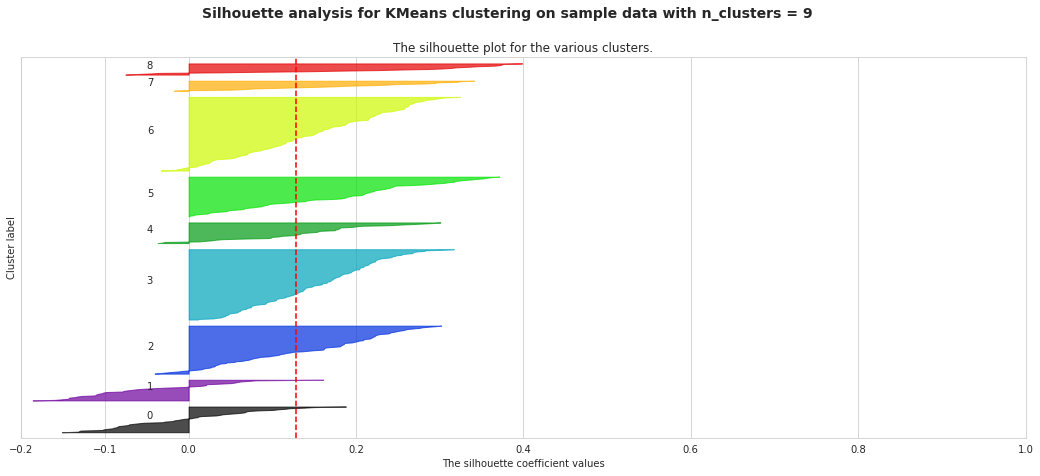

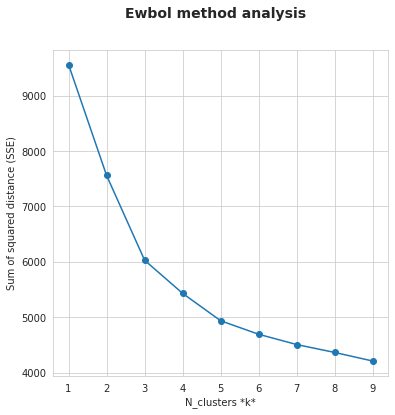


Derivatives for each n_cluster:
  n_clusters = 1: -2002.04286132983
  n_clusters = 2: -1531.0460319135018
  n_clusters = 3: -597.9897347961887
  n_clusters = 4: -494.408004996998
  n_clusters = 5: -243.94288261017573
  n_clusters = 6: -185.581184404542
  n_clusters = 7: -142.67634934404668
  n_clusters = 8: -154.88655312034007
Maximum absolute derivative:
  n_clusters = 2


In [128]:
range_n_clusters = list(range(1, 10))
sse = []

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_train)
    sse.append(clusterer.inertia_)

    if(n_clusters > 1):
      # Create a subplot with 1 row and 1 column
      fig, (ax1) = plt.subplots(1)
      fig.set_size_inches(18, 7)

      # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
      ax1.set_xlim([-0.2, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(x_train) + (n_clusters + 1) * 10])
      # The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters
      silhouette_avg = silhouette_score(x_train, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(x_train, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

plt.show()
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.suptitle(
          "Ewbol method analysis",
          fontsize=14,
          fontweight="bold",
        )
plt.plot(range_n_clusters, sse, '-o')
plt.xlabel(r'N_clusters *k*')
plt.ylabel('Sum of squared distance (SSE)')
plt.show()

abs_derivatives = []
print('\nDerivatives for each n_cluster:')
for n in range_n_clusters[1:]:
  curr_index = range_n_clusters.index(n)
  deriv = sse[curr_index] - sse[curr_index - 1]
  abs_derivatives += [abs(deriv)]
  print(f'  n_clusters = {range_n_clusters.index(curr_index)+1}: {deriv}')
print('Maximum absolute derivative:')
print(f'  n_clusters = {abs_derivatives.index(max(abs_derivatives))+2}')

              precision    recall  f1-score   support

           0       0.33      0.67      0.44        58
           1       0.75      0.42      0.54       137

    accuracy                           0.49       195
   macro avg       0.54      0.54      0.49       195
weighted avg       0.62      0.49      0.51       195



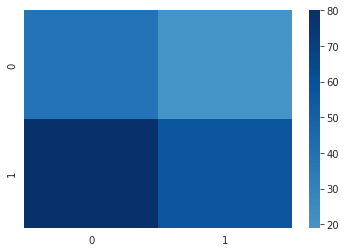

In [127]:
# Classification report based on the best value of K
clusterer = KMeans(n_clusters=2, random_state=10)
clusterer.fit(x_train)
predicted = clusterer.predict(x_test)
print(classification_report(y_test,predicted))
conf_matrix = confusion_matrix(y_test,predicted)
sns.heatmap(conf_matrix, center=True, cmap='Blues')
plt.show()

### 🧠 **Abordagem 2**

**Proposta:**
Avaliar o desempenho do Kmeans para diferentes valores de K e com **seleção de atributos** a partir de:
- Análise de correlação dos atributos com a coluna de labels
- Método da silhueta
- Método do cotovelo
- Classification report
```
n_clusters = [1,2,3,4,5,6,7,8,9]
```

**Resultados obtidos:**
- **Método da silhueta**
  - Análise do coeficiente e visualização por gráficos mostraram que o `melhor coeficiente de silhueta foi 0.56` com `k=2`
- **Método do cotovelo**
  - Análise da SSE e do gráfico de SSE para os diferentes k mostraram que o maior decaimento acontece quando `k=2`, onde se visualiza o "cotovelo" da curva
- **Classification report**
  - Métricas com o melhor k encontrado, `k=2`, não atingiram bons resultados, com `acurácia de apenas 21%`



#### Análise de Correlação
Serão testados modelos Kmeans com menos atributos, descartando os que possuirem uma baixa correlação com a coluna de labels.

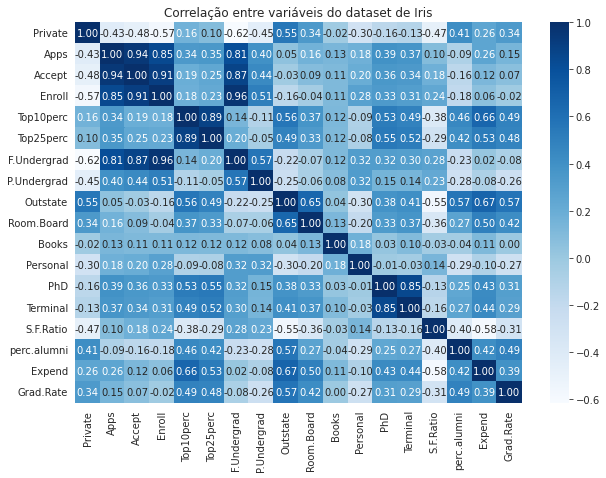

In [81]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Iris')
plt.show()

#### Seleção de atributos e preparação dos dados

In [116]:
# Select only columns that have a correlation greater than 0.3 with label column
df_minor = df[df.corr()[df.corr()['Private'].apply(abs) > 0.2].index]
df_minor

,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Outstate,Room.Board,Personal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,2885,537,7440,3300,2200,18.1,12,7041,60
1,1,2186,1924,512,2683,1227,12280,6450,1500,12.2,16,10527,56
2,1,1428,1097,336,1036,99,11250,3750,1165,12.9,30,8735,54
3,1,417,349,137,510,63,12960,5450,875,7.7,37,19016,59
4,1,193,146,55,249,869,7560,4120,1500,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,3089,2029,6797,3900,1200,21.0,14,4469,40
773,1,1959,1805,695,2849,1107,11520,4960,1250,13.3,31,9189,83
774,1,2097,1915,695,2793,166,6900,4200,781,14.4,20,8323,49
775,1,10705,2453,1317,5217,83,19840,6510,2115,5.8,49,40386,99


In [117]:
x_minor = df_minor.drop(['Private'],axis=1)
y_minor = df_minor["Private"]
x_train_minor, x_test_minor, y_train_minor, y_test_minor = train_test_split(x_minor, y_minor, test_size=0.25, random_state=42)

#### Modelos e avaliação

For n_clusters = 2 The average silhouette_score is : 0.5663119984622573
For n_clusters = 3 The average silhouette_score is : 0.4773369396615866
For n_clusters = 4 The average silhouette_score is : 0.3783495458928394
For n_clusters = 5 The average silhouette_score is : 0.39082128135028465
For n_clusters = 6 The average silhouette_score is : 0.3154888845180685
For n_clusters = 7 The average silhouette_score is : 0.30216864058229564
For n_clusters = 8 The average silhouette_score is : 0.30593034428621213
For n_clusters = 9 The average silhouette_score is : 0.3044799283275569


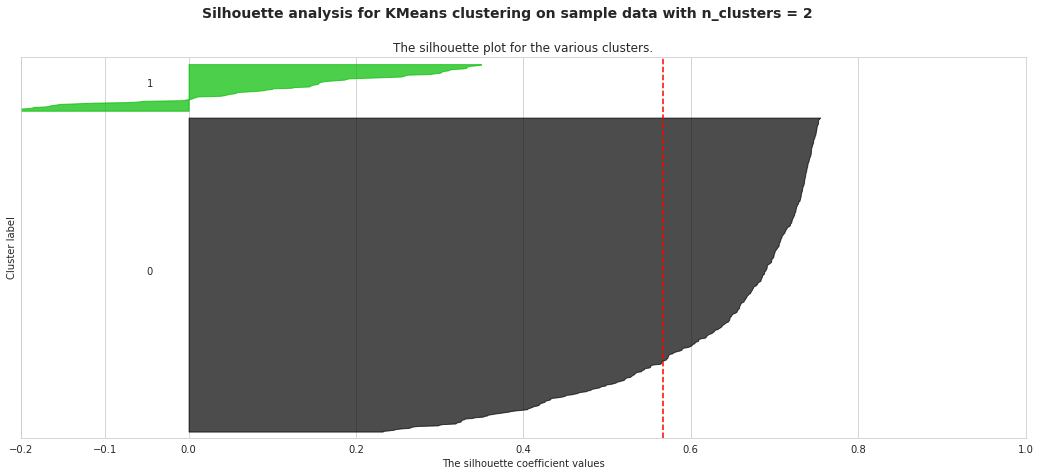

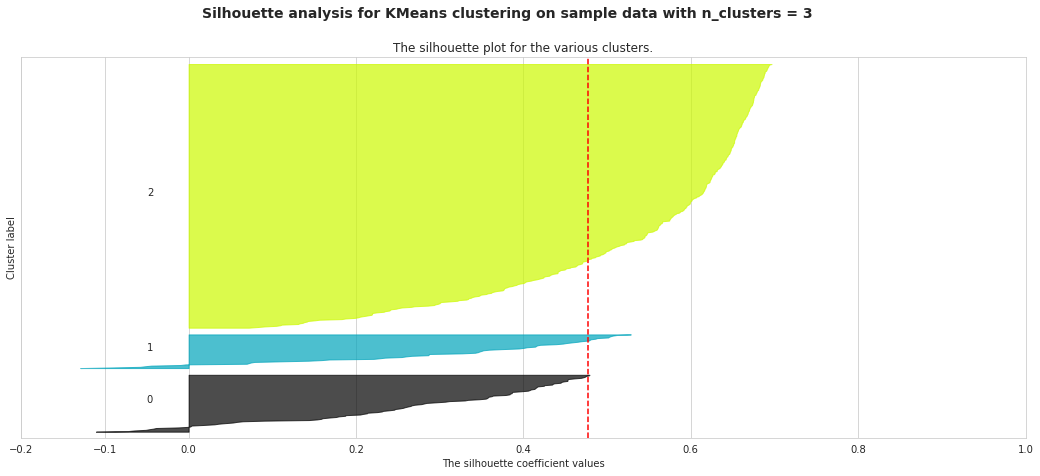

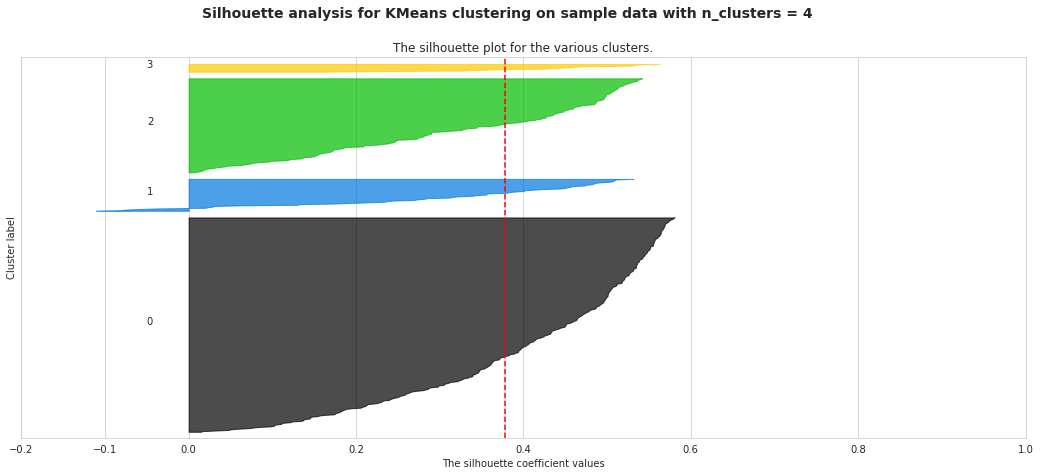

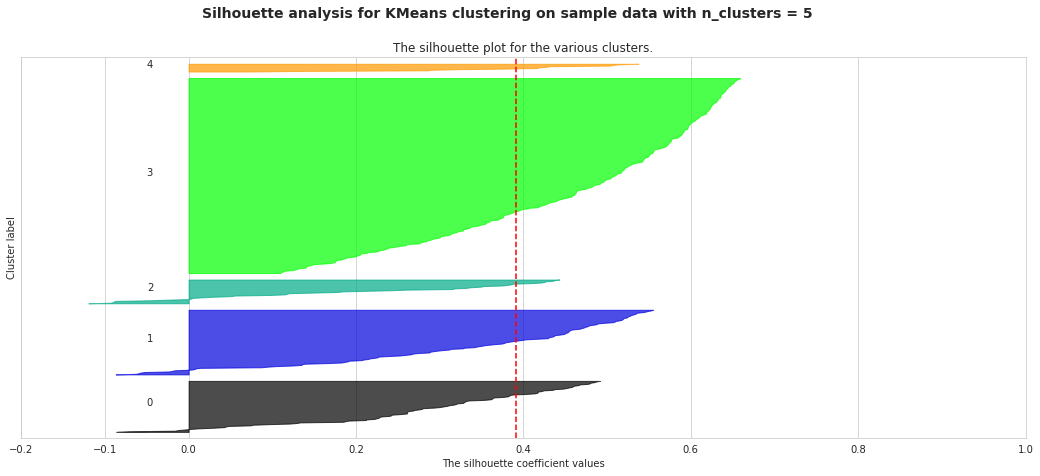

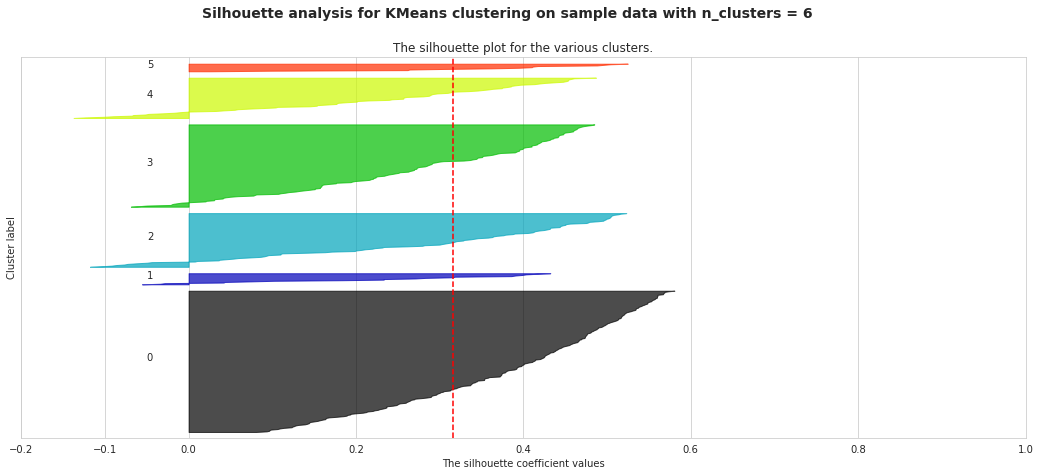

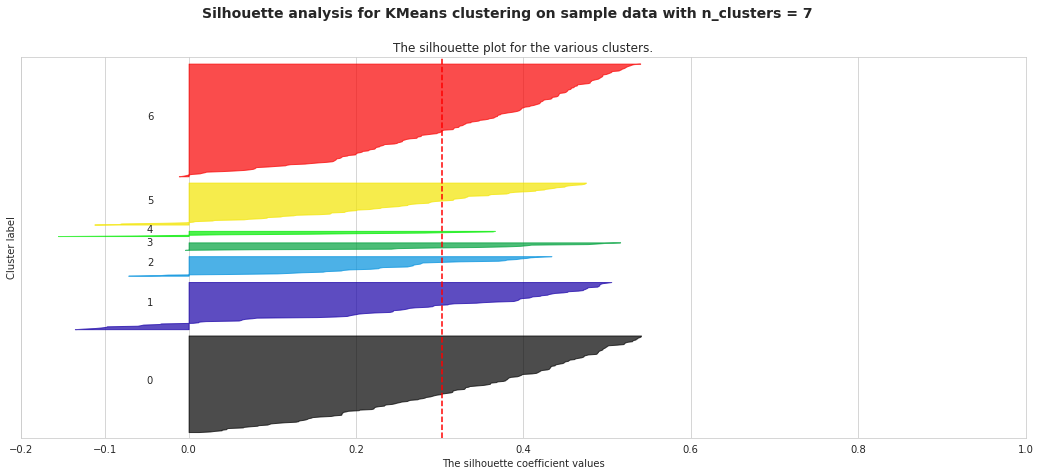

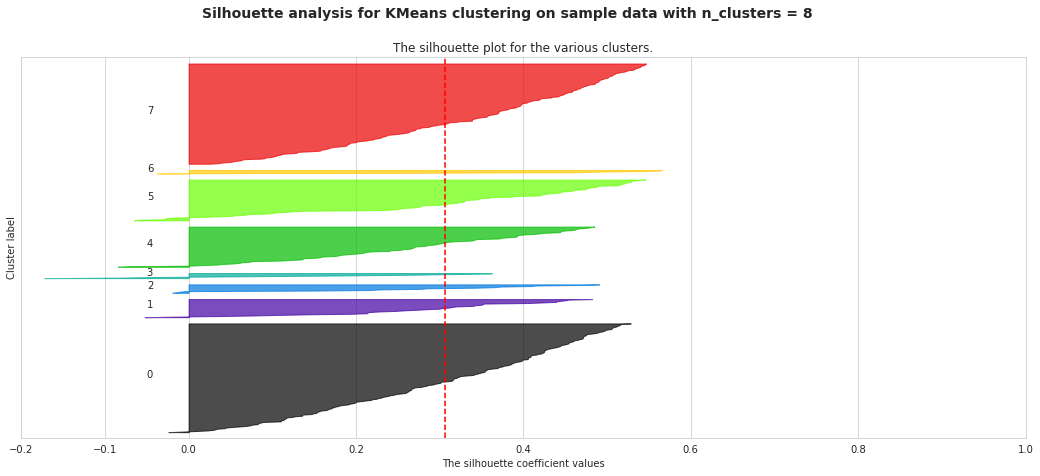

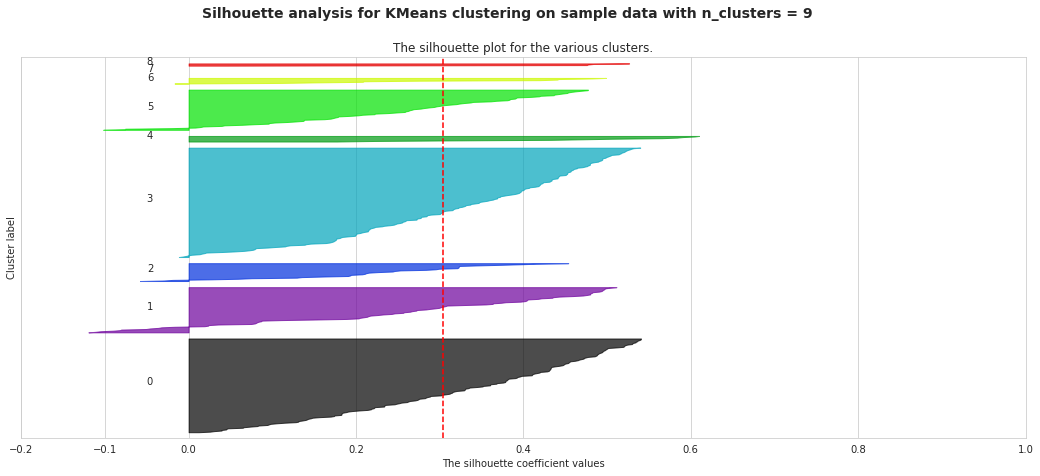

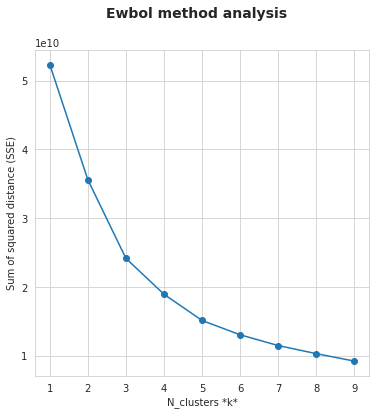


Derivatives for each n_cluster:
  n_clusters = 1: -16736871145.287682
  n_clusters = 2: -11424397906.668537
  n_clusters = 3: -5213314155.4639435
  n_clusters = 4: -3809148790.324032
  n_clusters = 5: -2084205687.5639744
  n_clusters = 6: -1564673426.370428
  n_clusters = 7: -1176342557.5996437
  n_clusters = 8: -1082342042.387535
Maximum absolute derivative:
  n_clusters = 2


In [125]:
range_n_clusters = list(range(1, 10))
sse = []

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_train_minor)
    sse.append(clusterer.inertia_)

    if(n_clusters > 1):
      # Create a subplot with 1 row and 1 column
      fig, (ax1) = plt.subplots(1)
      fig.set_size_inches(18, 7)

      # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
      ax1.set_xlim([-0.2, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(x_train_minor) + (n_clusters + 1) * 10])
      # The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters
      silhouette_avg = silhouette_score(x_train_minor, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(x_train_minor, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

plt.show()
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.suptitle(
          "Ewbol method analysis",
          fontsize=14,
          fontweight="bold",
        )
plt.plot(range_n_clusters, sse, '-o')
plt.xlabel(r'N_clusters *k*')
plt.ylabel('Sum of squared distance (SSE)')
plt.show()

abs_derivatives = []
print('\nDerivatives for each n_cluster:')
for n in range_n_clusters[1:]:
  curr_index = range_n_clusters.index(n)
  deriv = sse[curr_index] - sse[curr_index - 1]
  abs_derivatives += [abs(deriv)]
  print(f'  n_clusters = {range_n_clusters.index(curr_index)+1}: {deriv}')
print('Maximum absolute derivative:')
print(f'  n_clusters = {abs_derivatives.index(max(abs_derivatives))+2}')

              precision    recall  f1-score   support

           0       0.21      0.59      0.31        58
           1       0.23      0.05      0.08       137

    accuracy                           0.21       195
   macro avg       0.22      0.32      0.19       195
weighted avg       0.22      0.21      0.15       195



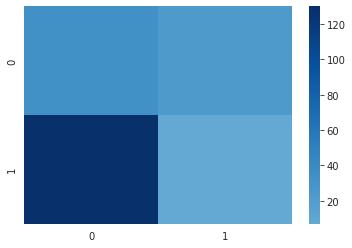

In [126]:
# Classification report based on the best value of K
clusterer = KMeans(n_clusters=2, random_state=10)
clusterer.fit(x_train_minor)
predicted = clusterer.predict(x_test_minor)
print(classification_report(y_test_minor,predicted))
conf_matrix = confusion_matrix(y_test_minor,predicted)
sns.heatmap(conf_matrix, center=True, cmap='Blues')
plt.show()

## **Conclusão**
As duas abordagens aplicadas para o processo não-supervisionado de clusterização revelaram algumas informações interessantes sobre os dados:
- Nas duas abordagens utilizadas, o melhor valor encontrado para k foi 2;
- Com o `uso de todos os atributos descritivos` fornecidos, o K-means atingiu uma `melhor acurácia para classificar as universidades como privadas ou públicas`, mas obteve `clusters menos definidos e separados` entre si;
- Com o `uso de menos atributos`, a partir da análise da matriz de correlação, o K-means atingiu uma `acurácia mais baixa para a classificação das universidades como públicas ou privadas`, mas apresentou uma `melhor clusterização` (com melhor SSE e coeficiente de silhueta). Esse resultado indica que `os dados possuem um outro padrão que permite sua separação em 2 grupos, mas que não correspondem à caracterização de faculdades como públicas ou privadas`.
